Data understanding and cleaning

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from coresets import *
from sklearn.preprocessing import StandardScaler



#reading data

df=pd.read_csv("heart.csv")
df.head()



,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [2]:
# shape of data

df.shape

(319795, 18)

In [3]:
# data info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
# checking null values
df.isnull().sum()

# # dropping null values
# df=df.dropna()
# df.shape


HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [5]:
#checking for ouliers
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [6]:
# removing outliers 
index = df[(df['SleepTime'] <= df['SleepTime'].quantile(0.05))|(df['SleepTime'] >= df['SleepTime'].quantile(0.95))].index
df.drop(index, inplace=True)

index1 = df[df['BMI'] >= df['BMI'].quantile(0.95)].index
df.drop(index1, inplace=True)


df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,248962.000000,248962.000000,248962.000000,248962.000000
mean,27.297357,2.614118,3.216929,7.125087
std,4.797426,6.925709,7.087267,0.780192
min,12.020000,0.000000,0.000000,6.000000
25%,23.750000,0.000000,0.000000,7.000000
50%,26.690000,0.000000,0.000000,7.000000
75%,30.410000,1.000000,2.000000,8.000000
max,39.560000,30.000000,30.000000,8.000000


In [7]:
# checking unique values

for i in df.columns:
    print(f'Unique Values of {i.title()}: {df[i].unique()}')


Unique Values of Heartdisease: ['No' 'Yes']
Unique Values of Bmi: [20.34 26.58 24.21 ... 27.42 15.57 16.18]
Unique Values of Smoking: ['No' 'Yes']
Unique Values of Alcoholdrinking: ['No' 'Yes']
Unique Values of Stroke: ['Yes' 'No']
Unique Values of Physicalhealth: [ 0. 20. 28.  7.  1.  2. 30.  5.  4.  6. 15.  3. 14. 18.  8. 10. 16. 25.
 21. 12. 29. 19. 22.  9. 13. 17. 26. 23. 27. 24. 11.]
Unique Values of Mentalhealth: [ 0. 30.  5. 15.  4. 10.  2.  3. 14.  8. 20.  1.  7. 28. 16. 12. 24.  6.
 25.  9. 18. 21. 29. 17. 23. 22. 13. 27. 26. 11. 19.]
Unique Values of Diffwalking: ['No' 'Yes']
Unique Values of Sex: ['Female' 'Male']
Unique Values of Agecategory: ['80 or older' '65-69' '75-79' '40-44' '50-54' '70-74' '45-49' '60-64'
 '55-59' '18-24' '35-39' '25-29' '30-34']
Unique Values of Race: ['White' 'Black' 'American Indian/Alaskan Native' 'Asian' 'Hispanic'
 'Other']
Unique Values of Diabetic: ['No' 'Yes' 'No, borderline diabetes' 'Yes (during pregnancy)']
Unique Values of Physicalactivi

In [8]:


le = LabelEncoder()

#changing object to float type

x=df
x=x.replace(to_replace ="No, borderline diabetes", value ="Yes")
x=x.replace(to_replace ="Yes (during pregnancy)", value ="No")

categorical_var=['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer', 'HeartDisease']
for i in categorical_var:
   x[i]=x[i].apply(lambda x: 0 if x=='No'else 1).astype('int')

x['Sex']=x['Sex'].apply(lambda x: 0 if x=='Female'else 1).astype('int')

# encoder 


x['Race'] = le.fit_transform(x['Race'])
x['GenHealth'] = le.fit_transform(x['GenHealth'])

x['AgeCategory']= le.fit_transform(x['AgeCategory'])

x=x.astype(float)
x.head(10)
# for i in x.columns:
#   print(f'Unique Values of {i.title()}: {x[i].unique()}')


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,0.0,20.34,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,5.0,0.0,1.0,4.0,7.0,0.0,0.0,0.0
2,0.0,26.58,1.0,0.0,0.0,20.0,30.0,0.0,1.0,9.0,5.0,1.0,1.0,1.0,8.0,1.0,0.0,0.0
3,0.0,24.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,5.0,0.0,0.0,2.0,6.0,0.0,0.0,1.0
4,0.0,23.71,0.0,0.0,0.0,28.0,0.0,1.0,0.0,4.0,5.0,0.0,1.0,4.0,8.0,0.0,0.0,0.0
12,0.0,28.37,1.0,0.0,0.0,0.0,0.0,1.0,1.0,11.0,5.0,1.0,1.0,4.0,8.0,0.0,0.0,0.0
13,0.0,28.15,0.0,0.0,0.0,7.0,0.0,1.0,0.0,12.0,5.0,0.0,0.0,2.0,7.0,0.0,0.0,0.0
15,0.0,29.18,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,5.0,0.0,1.0,4.0,6.0,0.0,0.0,0.0
17,0.0,22.59,1.0,0.0,0.0,0.0,30.0,1.0,1.0,10.0,5.0,1.0,1.0,2.0,8.0,0.0,0.0,0.0
19,0.0,18.13,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,5.0,0.0,1.0,0.0,8.0,0.0,0.0,1.0
20,0.0,21.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,1.0,0.0,2.0,8.0,0.0,0.0,0.0


In [9]:
# scaling the data usinf min max scaler
y=x
cols = y.columns
ms = StandardScaler()

y = ms.fit_transform(y)
y = pd.DataFrame(y, columns=[cols])
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248962 entries, 0 to 248961
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   (HeartDisease,)      248962 non-null  float64
 1   (BMI,)               248962 non-null  float64
 2   (Smoking,)           248962 non-null  float64
 3   (AlcoholDrinking,)   248962 non-null  float64
 4   (Stroke,)            248962 non-null  float64
 5   (PhysicalHealth,)    248962 non-null  float64
 6   (MentalHealth,)      248962 non-null  float64
 7   (DiffWalking,)       248962 non-null  float64
 8   (Sex,)               248962 non-null  float64
 9   (AgeCategory,)       248962 non-null  float64
 10  (Race,)              248962 non-null  float64
 11  (Diabetic,)          248962 non-null  float64
 12  (PhysicalActivity,)  248962 non-null  float64
 13  (GenHealth,)         248962 non-null  float64
 14  (SleepTime,)         248962 non-null  float64
 15  (Asthma,)        

In [10]:
# applying kmeans on full dataset

cost_full={}

cost=[]
time_=[]

for i in range(25):
  t0= time.time()
  kmeans = KMeans(n_clusters=100, init='k-means++', max_iter=5,n_init=1).fit(y)
  t1=time.time()-t0
  cost.append(kmeans.inertia_)
  time_.append(t1)

cost_full[100]= [sum(cost)/len(cost), sum(time_)/len(time_)]

# for k=500
cost=[]
time_=[]
for i in range(25):
   t0= time.time()
   kmeans = KMeans(n_clusters=200, init='k-means++', max_iter=5,n_init=1).fit(y)
   t1=time.time()-t0
   cost.append(kmeans.inertia_)
   time_.append(t1)

cost_full[200]= [sum(cost)/len(cost), sum(time_)/len(time_)]


print(cost_full)

 

{100: [1402966.2702944886, 1.3859212398529053], 200: [1115320.3242545445, 2.8303864097595213]}


In [11]:
# applying k-means on lightweight coreset

from sklearn.cluster import KMeans

centers=[100,200]
subset_le=[1000,2000,3000,4000,5000]
cost_lightweight={}

for center in centers:
    for lenth in subset_le:
        cost=[]
        time_=[]
        
        for i in range(25):
            t0= time.time()
            y_coreset, y_weights=lightweight(y,lenth)
            kmeans = KMeans(n_clusters=center, init='k-means++', max_iter=5,n_init=1).fit(y_coreset, sample_weight=y_weights)
            t1=time.time()-t0
            cost.append(kmeans.inertia_)
            time_.append(t1)
        
        cost_lightweight[(center,lenth)]= [sum(cost)/len(cost), sum(time_)/len(time_)]

print(cost_lightweight)

{(100, 1000): [1239312.855919156, 0.040939197540283204], (100, 2000): [1321761.498143725, 0.048248825073242185], (100, 3000): [1355547.9293948591, 0.05526630401611328], (100, 4000): [1373725.074242958, 0.060091371536254885], (100, 5000): [1381865.0892768356, 0.06764384269714356], (200, 1000): [831555.8356082827, 0.06491524696350098], (200, 2000): [982906.6658868166, 0.08000555992126465], (200, 3000): [1030337.4093417578, 0.09281994819641114], (200, 4000): [1055983.5495683264, 0.12115145683288574], (200, 5000): [1068002.6458171573, 0.13610429763793946]}


In [12]:
# applying kmeans on uniform coreset
centers=[100,200]
subset_le=[1000,2000,3000,4000,5000]
cost_uniform={}

for center in centers:
    for lenth in subset_le:
        cost=[]
        time_=[]
        for i in range(25):
            t0= time.time()
            y_coreset, y_weights=uniform(y,lenth)
            kmeans = KMeans(n_clusters=center, init='k-means++', max_iter=5, n_init=1).fit(y_coreset, sample_weight=y_weights)
            t1=time.time()-t0  
            cost.append(kmeans.inertia_)
            time_.append(t1)
        cost_uniform[(center,lenth)]= [sum(cost)/len(cost), sum(time_)/len(time_)]


print(cost_uniform)


{(100, 1000): [1121225.3386477819, 0.03522749900817871], (100, 2000): [1266789.7300573196, 0.04747805595397949], (100, 3000): [1308589.3750651067, 0.04822755813598633], (100, 4000): [1319251.1815047849, 0.05507118225097656], (100, 5000): [1340145.2443556986, 0.06493358612060547], (200, 1000): [654667.4723482733, 0.05787364959716797], (200, 2000): [878672.7772058281, 0.06986239433288574], (200, 3000): [951876.029501609, 0.09250859260559081], (200, 4000): [987706.1032123637, 0.10304780006408691], (200, 5000): [1021097.2722940568, 0.11358111381530761]}


In [13]:
x_axis=[1000,2000,3000,4000,5000]
y_axis_100_light=[]
y_axis_200_light=[]
y_axis_100_uni=[]
y_axis_200_uni=[]

for key,value in cost_lightweight.items():
    if key[0]==100:
        y_axis_100_light.append(value[0])
    else:
        y_axis_200_light.append(value[0])

for key,value in cost_uniform.items():
    if key[0]==100:
        y_axis_100_uni.append(value[0])
    else:
        y_axis_200_uni.append(value[0])

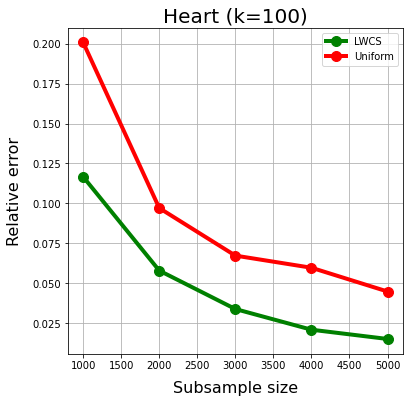

In [14]:
# plotting of relative error for k=100


# finding relative error
for i in range(len(x_axis)):
    y_axis_100_light[i]=abs(y_axis_100_light[i]-cost_full[100][0])/cost_full[100][0]
    y_axis_100_uni[i]=abs(y_axis_100_uni[i]-cost_full[100][0])/cost_full[100][0]


plt.figure(figsize=(6,6))
plt.plot(x_axis, y_axis_100_light, color='green' , marker='o', markersize=10, linestyle='-', linewidth=4, label='LWCS')
plt.plot(x_axis, y_axis_100_uni, color='red' , marker='o', markersize=10, linestyle='-', linewidth=4, label='Uniform')
plt.grid(True)
# here we add the axes labels
plt.ylabel('Relative error', size=16, labelpad=10)
plt.xlabel('Subsample size', size=16, labelpad=10)
# here we add the title
plt.title('Heart (k=100)', size=20)

plt.legend(loc='upper right',prop={'size':10})


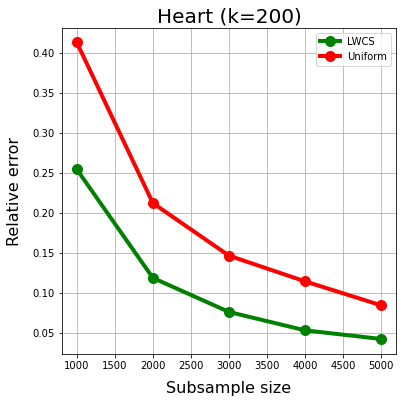

In [15]:
# plotting of relative error for k=200


# finding relative error
for i in range(len(x_axis)):
    y_axis_200_light[i]=abs(y_axis_200_light[i]-cost_full[200][0])/cost_full[200][0]
    y_axis_200_uni[i]=abs(y_axis_200_uni[i]-cost_full[200][0])/cost_full[200][0]




plt.figure(figsize=(6,6))
plt.plot(x_axis, y_axis_200_light, color='green' , marker='o', markersize=10, linestyle='-', linewidth=4, label='LWCS')
plt.plot(x_axis, y_axis_200_uni, color='red' , marker='o', markersize=10, linestyle='-', linewidth=4, label='Uniform')
plt.grid(True)
# here we add the axes labels
plt.ylabel('Relative error', size=16, labelpad=10)
plt.xlabel('Subsample size', size=16, labelpad=10)
# here we add the title
plt.title('Heart (k=200)', size=20)

plt.legend(loc='upper right',prop={'size':10})


In [17]:
# plotting speedup for k=100

x_axis=[1000,2000,3000,4000,5000]
y_axis_100_light=[]
y_axis_200_light=[]
y_axis_100_uni=[]
y_axis_200_uni=[]

# finding speedup

for key,value in cost_lightweight.items():
    if key[0]==100:
        y_axis_100_light.append(cost_full[100][1]/value[1])
    else:
        y_axis_200_light.append(cost_full[200][1]/value[1])

for key,value in cost_uniform.items():
    if key[0]==100:
        y_axis_100_uni.append(cost_full[100][1]/value[1])
    else:
        y_axis_200_uni.append(cost_full[200][1]/value[1])



[33.853160861035235, 28.724455730249666, 25.077147179026667, 23.063564775131457, 20.488505451382782]
[39.34202764525345, 29.190774811763134, 28.737122371923736, 25.165997590842153, 21.343673169055247]
[43.601257672961246, 35.377371429497785, 30.493298744040427, 23.36238031098304, 20.795716659064137]
[48.90630588291127, 40.513733272196156, 30.595929848666458, 27.466732991866525, 24.91951623543652]


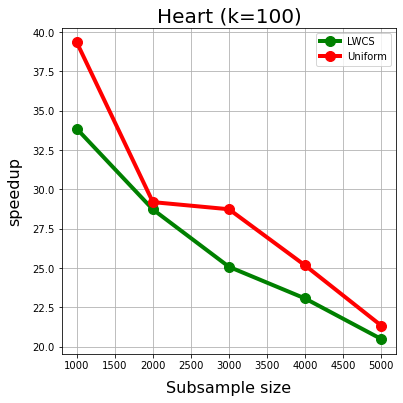

In [18]:
# plotting of speedup for k=100


plt.figure(figsize=(6,6))
plt.plot(x_axis, y_axis_100_light, color='green' , marker='o', markersize=10, linestyle='-', linewidth=4, label='LWCS')
plt.plot(x_axis, y_axis_100_uni, color='red' , marker='o', markersize=10, linestyle='-', linewidth=4, label='Uniform')
plt.grid(True)
# here we add the axes labels
plt.ylabel('speedup', size=16, labelpad=10)
plt.xlabel('Subsample size', size=16, labelpad=10)
# here we add the title
plt.title('Heart (k=100)', size=20)

plt.legend(loc='upper right',prop={'size':10})

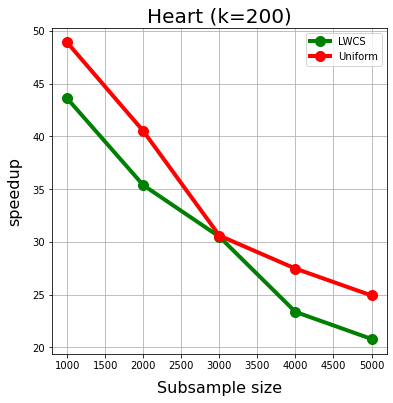

In [19]:
# plotting of speedup for k=200

plt.figure(figsize=(6,6))
plt.plot(x_axis, y_axis_200_light, color='green' , marker='o', markersize=10, linestyle='-', linewidth=4, label='LWCS')
plt.plot(x_axis, y_axis_200_uni, color='red' , marker='o', markersize=10, linestyle='-', linewidth=4, label='Uniform')
plt.grid(True)
# here we add the axes labels
plt.ylabel('speedup', size=16, labelpad=10)
plt.xlabel('Subsample size', size=16, labelpad=10)
# here we add the title
plt.title('Heart (k=200)', size=20)

plt.legend(loc='upper right',prop={'size':10})